In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import warnings
import pickle
import chardet
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
#metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, log_loss
from sklearn.model_selection import learning_curve

## **Partie 1: Collecte et Préparation des Données**

In [4]:
df_heart = pd.read_csv('/content/drive/MyDrive/INF6333/Datasets/heart.csv')

df_heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [5]:
df_heart.shape

(1025, 14)

In [6]:
df_heart.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [7]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Partie 2 : Analyse Exploratoire des Données

In [8]:
#maligne
df_heart_maligne = df_heart.loc[df_heart['target'] == 1]
df_heart_maligne.shape

(526, 14)

In [9]:
#Tumeur benigne
df_heart_benigne = df_heart.loc[df_heart['target'] == 0]
df_heart_benigne.shape

(499, 14)

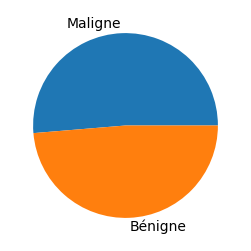

In [10]:
tr = ['Maligne', 'Bénigne']
tab = []
tab.append(df_heart_maligne.shape[0])
tab.append(df_heart_benigne.shape[0])
fig = plt.figure(figsize=(5,3))
plt.pie(tab, labels=tr)
plt.show()

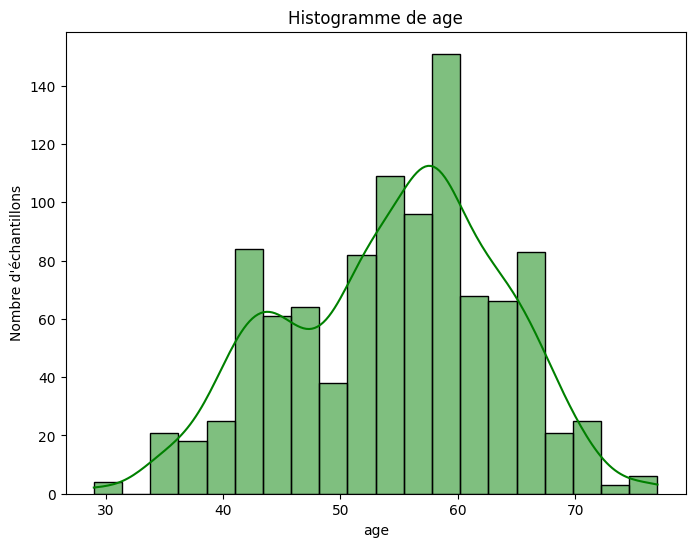

In [11]:
# Sélectionner seulement l'attribut 'age'
mean_radius = df_heart['age']

# Création d'un histogramme de l'attribut 'age'
plt.figure(figsize=(8, 6))
sns.histplot(mean_radius, bins=20, kde=True, color='green')
plt.title('Histogramme de age')
plt.xlabel('age')
plt.ylabel('Nombre d\'échantillons')
plt.show()

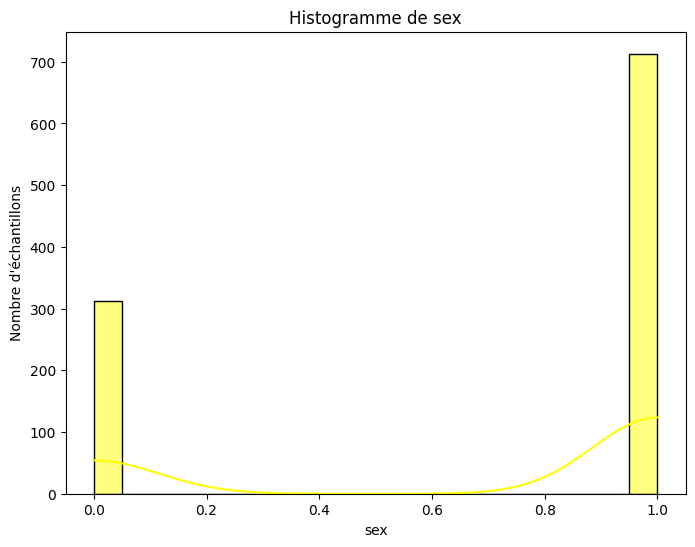

In [12]:
# Sélectionner seulement l'attribut 'sex'
sex = df_heart['sex']

# Création d'un histogramme de l'attribut 'sex'
plt.figure(figsize=(8, 6))
sns.histplot(sex, bins=20, kde=True, color='yellow')
plt.title('Histogramme de sex')
plt.xlabel('sex')
plt.ylabel('Nombre d\'échantillons')
plt.show()

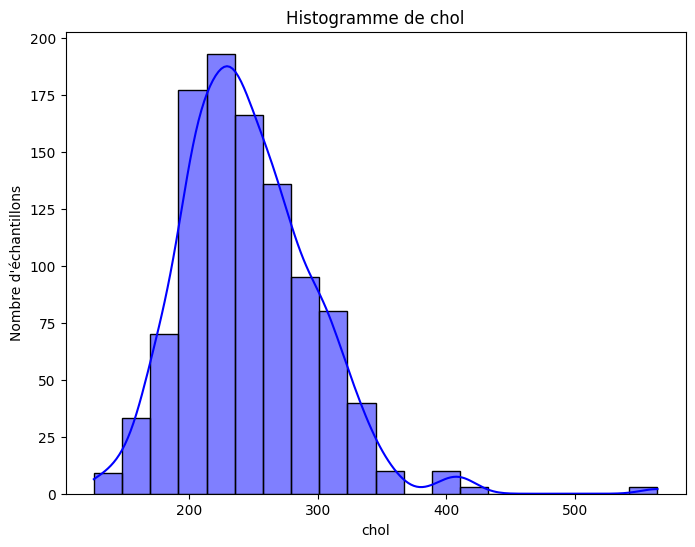

In [13]:
# Sélectionner seulement l'attribut 'chol'
chol = df_heart['chol']

# Création d'un histogramme de l'attribut 'chol'
plt.figure(figsize=(8, 6))
sns.histplot(chol, bins=20, kde=True, color='blue')
plt.title('Histogramme de chol')
plt.xlabel('chol')
plt.ylabel('Nombre d\'échantillons')
plt.show()

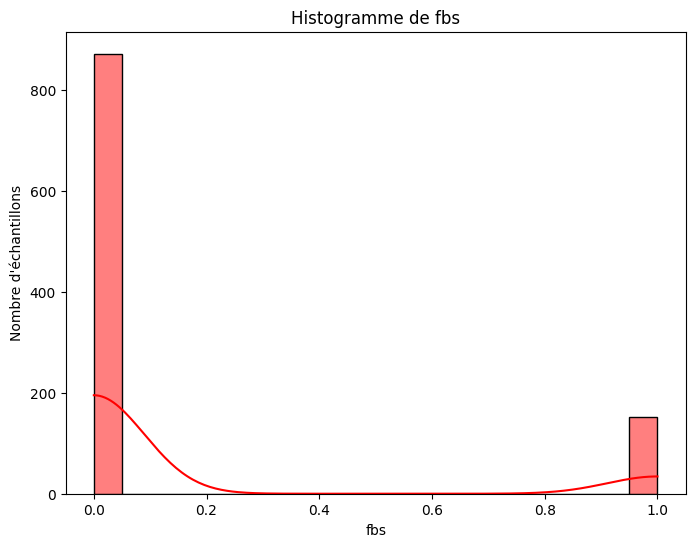

In [14]:
# Sélectionner seulement l'attribut 'fbs'
fbs = df_heart['fbs']

# Création d'un histogramme de l'attribut 'fbs'
plt.figure(figsize=(8, 6))
sns.histplot(fbs, bins=20, kde=True, color='red')
plt.title('Histogramme de fbs')
plt.xlabel('fbs')
plt.ylabel('Nombre d\'échantillons')
plt.show()

In [15]:
#Correlation entre les features
df_heart.corr().style.background_gradient(cmap='coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


##**Partie 3: Modélisation**

In [16]:
X = df_heart.drop('target', axis=1)  # X contient toutes les colonnes sauf 'target'
y = df_heart['target'] # y contient uniquement la colonne 'target'

In [17]:
# print(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((717, 13), (308, 13), (717,), (308,))

###LogisticRegression

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
y_pred_lr = log_reg.predict(X_test)
y_pred_lr

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,

In [20]:
# Algorithme : modèle Logistic Regression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score_lr = accuracy_score(y_test, y_pred_lr)
precision_score_lr = precision_score(y_test, y_pred_lr, average='macro')
recall_score_lr = recall_score(y_test, y_pred_lr, average='macro')
f1_score_lr = f1_score(y_test, y_pred_lr, average='macro')

print("accuracy lr = ",accuracy_score_lr)
print("precision lr = ",precision_score_lr)
print("recall lr = ",recall_score_lr)
print("f1 lr = ",f1_score_lr)

accuracy lr =  0.8701298701298701
precision lr =  0.874110492948635
recall lr =  0.8670192511106409
f1 lr =  0.8687127024722933


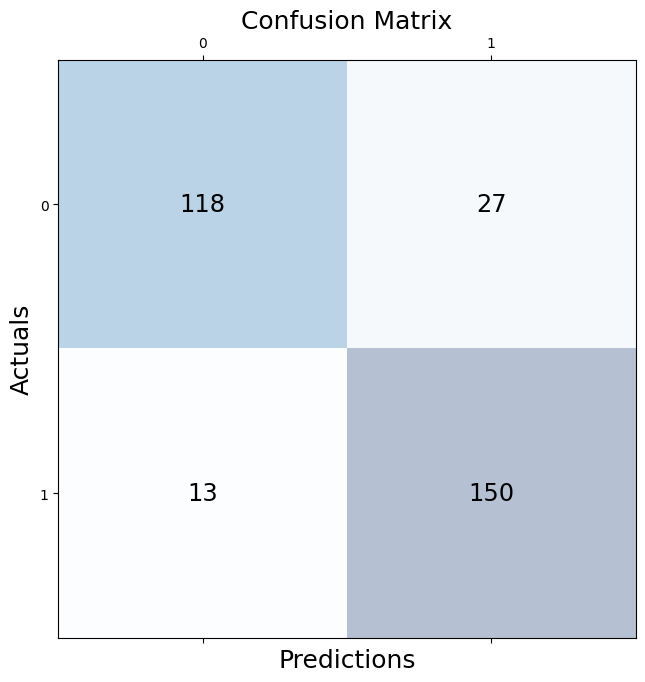

In [21]:
conf_matrix_lr = confusion_matrix(y_true=y_test, y_pred=y_pred_lr)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_lr, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_lr.shape[0]):
    for j in range(conf_matrix_lr.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_lr[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### K-Nearest Neighbour (KNN) Classification

In [22]:
# KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("{} KNN Score: {:.2f}%".format(2, knn.score(X_test, y_test)*100))

2 KNN Score: 92.53%


In [23]:
# Algorithme : modèle Random Forest Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score_knn = accuracy_score(y_test, y_pred_knn)
precision_score_knn = precision_score(y_test, y_pred_knn, average='macro')
recall_score_knn = recall_score(y_test, y_pred_knn, average='macro')
f1_score_knn = f1_score(y_test, y_pred_knn, average='macro')

print("accuracy knn = ",accuracy_score_knn)
print("precision knn = ",precision_score_knn)
print("recall knn = ",recall_score_knn)
print("f1 knn = ",f1_score_knn)

accuracy knn =  0.9253246753246753
precision knn =  0.9315476190476191
recall knn =  0.9294478527607362
f1 knn =  0.925304990562954


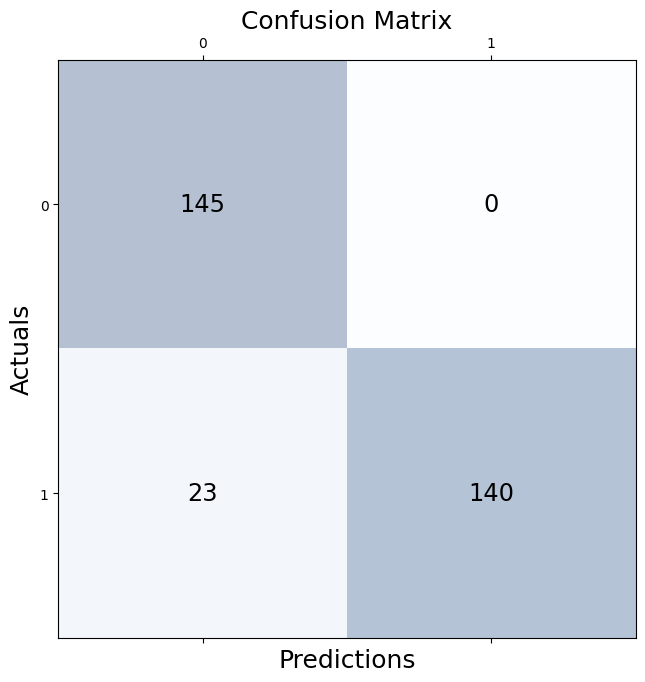

In [24]:
conf_matrix_knn = confusion_matrix(y_true=y_test, y_pred=y_pred_knn)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_knn, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_knn.shape[0]):
    for j in range(conf_matrix_knn.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_knn[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Support Vector Machine (SVM) Algorithm

In [25]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)
svm.fit(X_train, y_train)

acc = svm.score(X_test,y_test)*100
y_pred_svm = svm.predict(X_test)

print("Test Accuracy of SVM Algorithm: {:.2f}%".format(acc))

Test Accuracy of SVM Algorithm: 75.00%


In [26]:
y_pred_svm = svm.predict(X_test)
y_pred_svm

array([1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1,

In [27]:
# Algorithme : modèle Random Forest Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score_svm= accuracy_score(y_test, y_pred_svm)
precision_score_svm= precision_score(y_test, y_pred_svm, average='macro')
recall_score_svm= recall_score(y_test, y_pred_svm, average='macro')
f1_score_svm= f1_score(y_test, y_pred_svm, average='macro')

print("accuracy scm = ",accuracy_score_svm)
print("precision scm = ",precision_score_svm)
print("recall scm = ",recall_score_svm)
print("f1 scm = ",f1_score_svm)

accuracy scm =  0.75
precision scm =  0.75
recall scm =  0.7474296594034271
f1 scm =  0.748063950709088


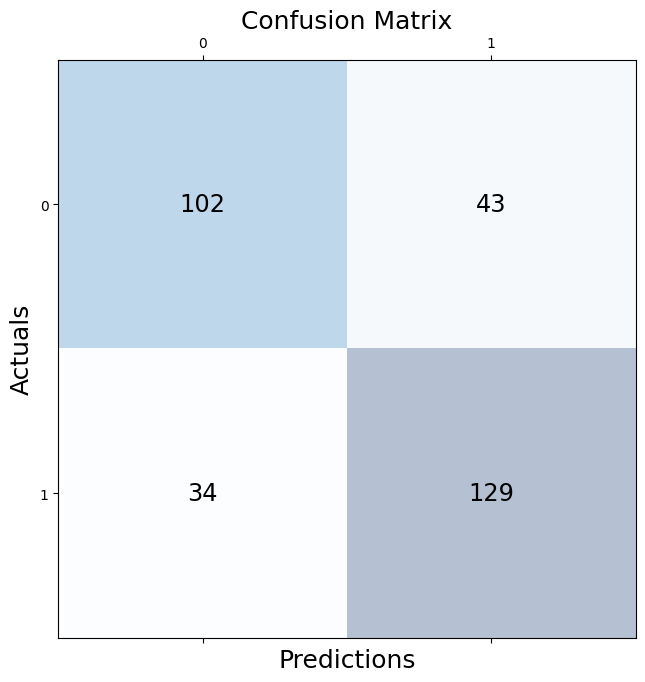

In [28]:
conf_matrix_svm = confusion_matrix(y_true=y_test, y_pred=y_pred_svm)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_svm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_svm.shape[0]):
    for j in range(conf_matrix_svm.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_svm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Naive Bayes Algorithm

In [29]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

acc = naive_bayes.score(X_test,y_test)*100
y_pred_naive_bayes = naive_bayes.predict(X_test)

print("Accuracy of Naive Bayes: {:.2f}%".format(acc))

Accuracy of Naive Bayes: 84.42%


In [30]:
# Algorithme : modèle Random Forest Classifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy_score_nb = accuracy_score(y_test, y_pred_naive_bayes)
precision_score_nb = precision_score(y_test, y_pred_naive_bayes, average='macro')
recall_score_nb = recall_score(y_test, y_pred_naive_bayes, average='macro')
f1_score_nb = f1_score(y_test, y_pred_naive_bayes, average='macro')

print("accuracy nb = ",accuracy_score_nb)
print("precision nb = ",precision_score_nb)
print("recall nb = ",recall_score_nb)
print("f1 nb = ",f1_score_nb)

accuracy nb =  0.8441558441558441
precision nb =  0.8445787748499425
recall nb =  0.8424793738100275
f1 nb =  0.8432038011199728


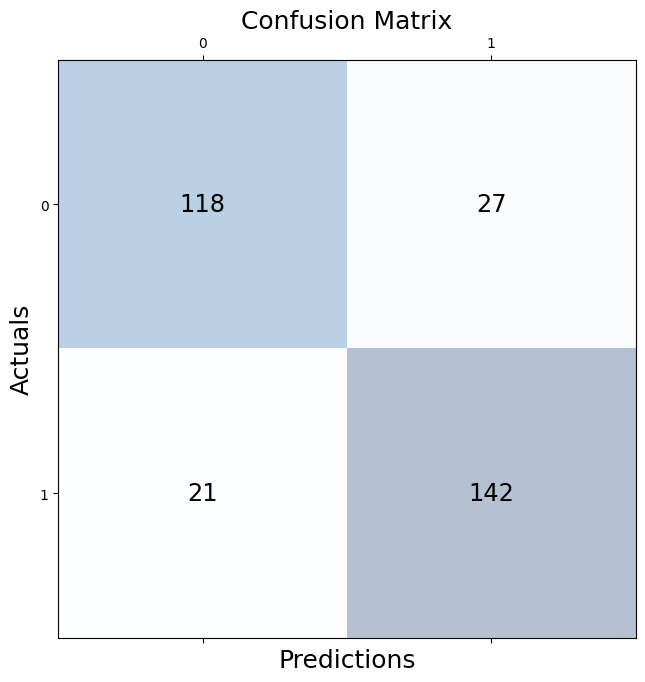

In [31]:
conf_matrix_nb = confusion_matrix(y_true=y_test, y_pred=y_pred_naive_bayes)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(7.5, 7.5))
ax.matshow(conf_matrix_nb, cmap=plt.cm.Blues, alpha=0.3)
for i in range(conf_matrix_nb.shape[0]):
    for j in range(conf_matrix_nb.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix_nb[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### Confusion Matrix

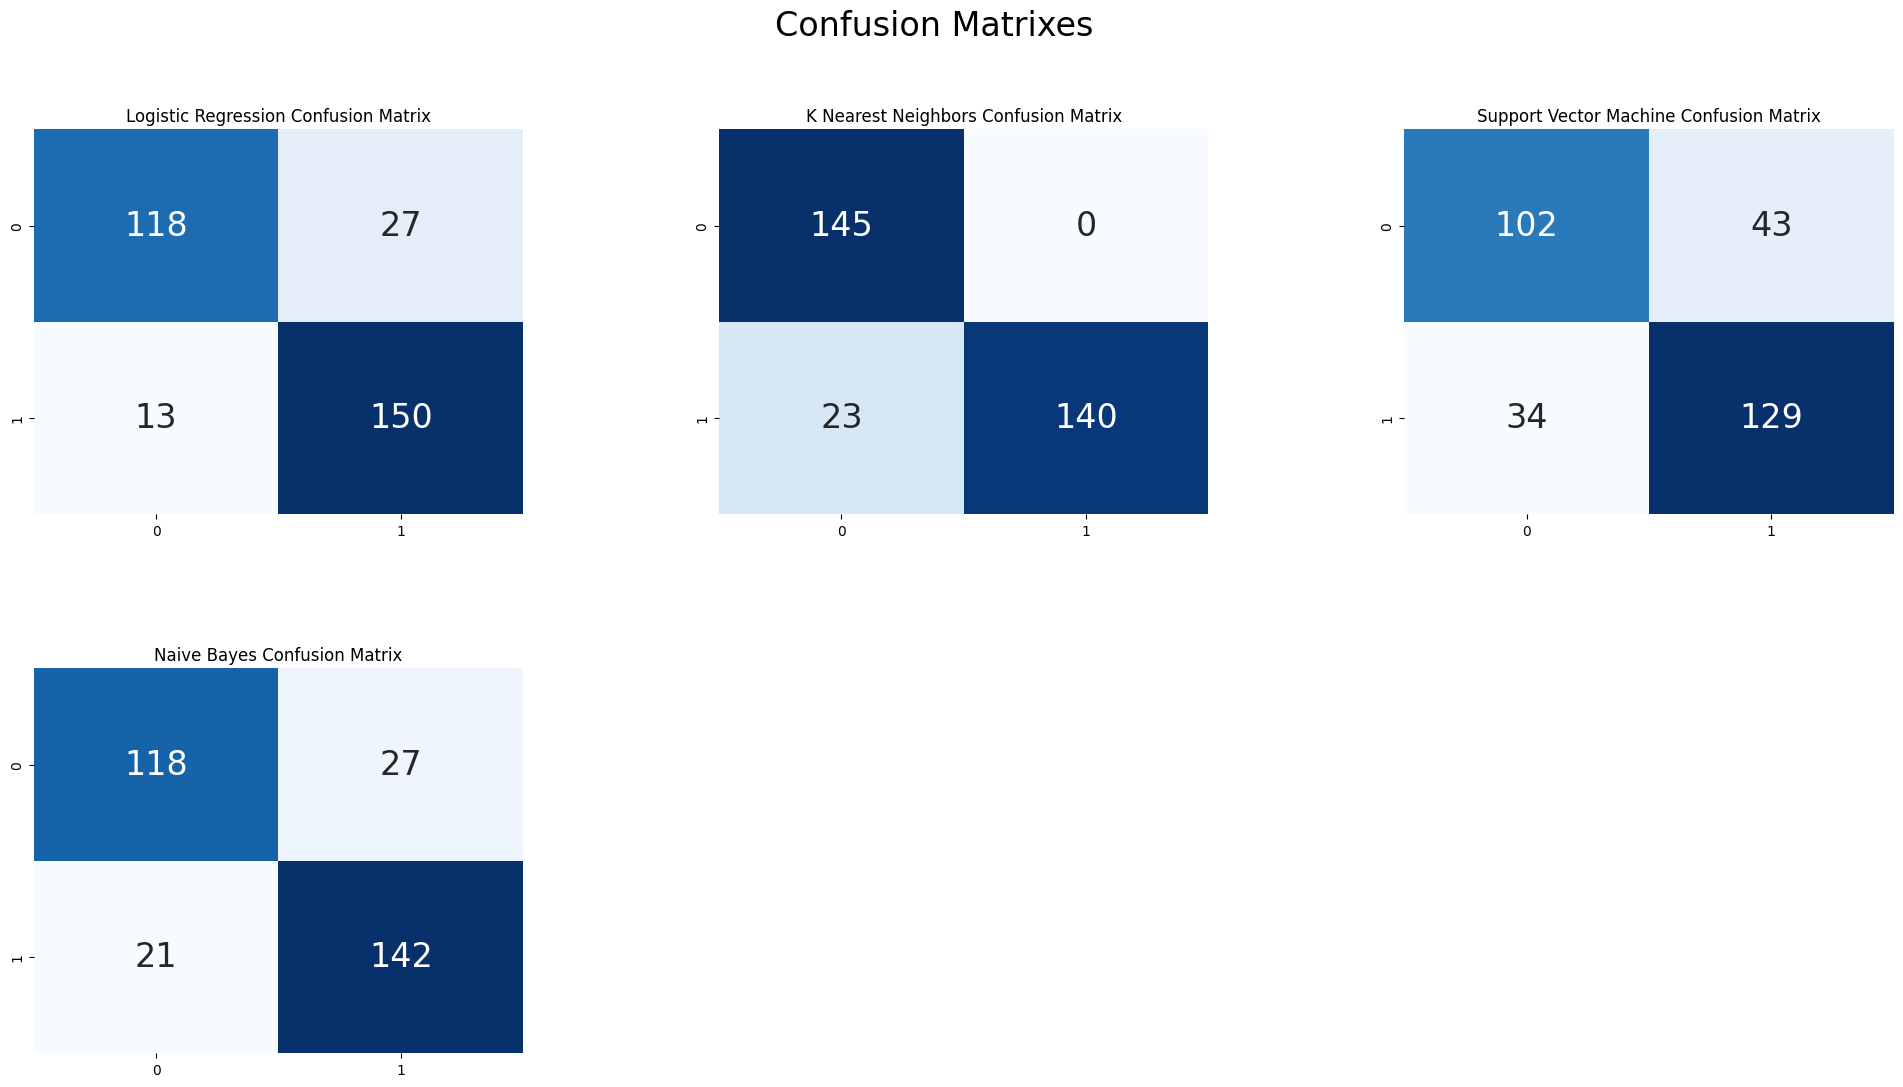

In [32]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,1)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(conf_matrix_lr,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,2)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(conf_matrix_knn,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,3)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(conf_matrix_svm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,3,4)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(conf_matrix_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.show()

## Partir 4 : Interprétation des Résultats

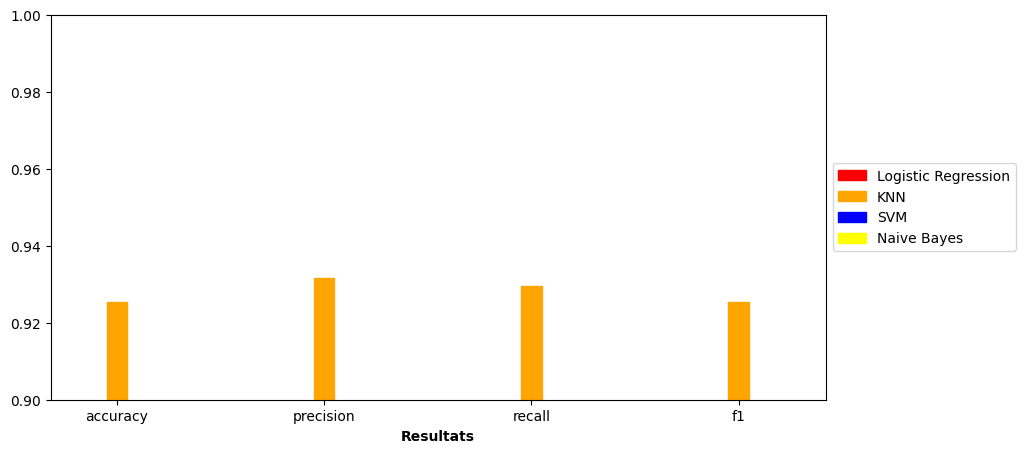

In [33]:
#Comparaison entre 4 algorithmes en utilisant la bibliothèque matplotlib pour tracer "bar chart".
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(10,5)
ax.set(ylim=[0.9, 1.0])

score_algo1 = [accuracy_score_lr, precision_score_lr, recall_score_lr, f1_score_lr]
score_algo2 = [accuracy_score_knn, precision_score_knn, recall_score_knn, f1_score_knn]
score_algo3 = [accuracy_score_svm, precision_score_svm, recall_score_svm, f1_score_svm]
score_algo4 = [accuracy_score_nb, precision_score_nb, recall_score_nb, f1_score_nb]

barWidth = 0.1  # the width of the bars

# Set position of bar on X axis
r1 = np.arange(4)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Make the plot
plt.bar(r1, score_algo1, color='red', width=barWidth, edgecolor='red', label='Logistic Regression')
plt.bar(r2, score_algo2, color='orange', width=barWidth, edgecolor='orange', label='KNN')
plt.bar(r3, score_algo3, color='blue', width=barWidth, edgecolor='blue', label='SVM')
plt.bar(r4, score_algo4, color='yellow', width=barWidth, edgecolor='yellow', label='Naive Bayes')

# Add xticks on the middle of the group bars
plt.xlabel('Resultats', fontweight='bold')
plt.xticks([r + barWidth for r in range(4)], ['accuracy', 'precision', 'recall', 'f1'])

# Create legend & Show graphic
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()